### Pacotes e dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
from datetime import datetime
from qbstyles import mpl_style; mpl_style(dark=True)

In [2]:
df = pd.read_pickle("../data/raw/capes_query.pkl", compression='bz2')
print(f"Shape: {df.shape}")
display(df.head(3))

Shape: (146036, 13)


,ano_inicial,mes_inicial,ano_final,mes_final,id_processo_concessao,programa_capes,pais_destino,grande_area_conhecimento,nivel_ensino,uf_instituicao_origem,instituicao_ensino_origem,instituicao_ensino_principal,valor_recebido_total
0,2005,4,2010,3,1898-04-3,DAAD,ALEMANHA,ENGENHARIAS,DOUTORADO PLENO,SÃO PAULO,INSTITUTO TECNOLÓGICO DE AERONÁUTICA,TECHNISCHE UNIVERSITÄT DARMSTADT,1300.0
1,2005,9,2010,3,2725-04-5,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,REINO UNIDO,CIÊNCIAS SOCIAIS APLICADAS,DOUTORADO PLENO,SÃO PAULO,FUNDAÇÃO GETÚLIO VARGAS,UNIVERSITY OF WARWICK,2730.0
2,2006,10,2010,9,3158-05-5,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,REINO UNIDO,CIÊNCIAS SOCIAIS APLICADAS,DOUTORADO PLENO,RIO DE JANEIRO,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,UNIVERSITY OF CAMBRIDGE,8190.0


In [3]:
df[df["instituicao_ensino_principal"].isnull()]

,ano_inicial,mes_inicial,ano_final,mes_final,id_processo_concessao,programa_capes,pais_destino,grande_area_conhecimento,nivel_ensino,uf_instituicao_origem,instituicao_ensino_origem,instituicao_ensino_principal,valor_recebido_total
801,2011,11,2013,2,0116-11-4,PPDE - PROGRAMA DE PÓS-DOUTORADO NO EXTERIOR,ESTADOS UNIDOS,"LINGÜÍSTICA, LETRAS E ARTES",ESTÁGIO PÓS-DOUTORAL,RIO DE JANEIRO,UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO,None,5804.0
802,2011,11,2013,4,0561-11-8,PPDE - PROGRAMA DE PÓS-DOUTORADO NO EXTERIOR,ALEMANHA,CIÊNCIAS BIOLÓGICAS,ESTÁGIO PÓS-DOUTORAL,SÃO PAULO,UNIVERSIDADE FEDERAL DE SÃO PAULO,None,8400.0
803,2011,11,2013,4,0561-11-8,PPDE - PROGRAMA DE PÓS-DOUTORADO NO EXTERIOR,ALEMANHA,CIÊNCIAS BIOLÓGICAS,ESTÁGIO PÓS-DOUTORAL,SÃO PAULO,UNIVERSIDADE FEDERAL DE SÃO PAULO,None,1706.0
804,2011,11,2013,4,3628-11-6,CAPES/COFECUB (COMITÊ FRANCÊS DE AVALIAÇÃO DA ...,FRANÇA,CIÊNCIAS EXATAS E DA TERRA,DOUTORADO SANDUÍCHE,RIO GRANDE DO SUL,UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL,None,5320.0
805,2011,11,2013,4,4942-11-6,CAPES/COFECUB (COMITÊ FRANCÊS DE AVALIAÇÃO DA ...,FRANÇA,CIÊNCIAS EXATAS E DA TERRA,DOUTORADO SANDUÍCHE,SÃO PAULO,UNIVERSIDADE DE SÃO PAULO,None,5320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146031,2014,8,2018,7,99999.013449/2013-03,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,ESTADOS UNIDOS,CIÊNCIAS EXATAS E DA TERRA,DOUTORADO PLENO,DISTRITO FEDERAL,UNIVERSIDADE DE BRASÍLIA,None,33904.0
146032,2014,8,2018,7,99999.013467/2013-01,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,ESTADOS UNIDOS,CIÊNCIAS EXATAS E DA TERRA,DOUTORADO PLENO,SÃO PAULO,UNIVERSIDADE DE SÃO PAULO,None,35508.0
146033,2014,8,2018,7,99999.013472/2013-05,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,ALEMANHA,MULTIDISCIPLINAR,DOUTORADO PLENO,PARANÁ,UNIVERSIDADE FEDERAL DO PARANÁ,None,NaN
146034,2014,8,2018,5,99999.013478/2013-03,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,ESTADOS UNIDOS,CIÊNCIAS BIOLÓGICAS,DOUTORADO PLENO,RIO DE JANEIRO,FUNDACAO OSWALDO CRUZ (FIOCRUZ),None,11900.0


### Tratando nulos

In [4]:
def nan_report(data):
    list = []
    total = 0
    for col in data.columns:
        nulls = data[col].isnull().sum()
        if nulls > 0:
            total = total + nulls
            frac_nulls = round(100*nulls/data.shape[0], 2)
            print(f"Nulos em {col}:", nulls, "\nPorcentagem:", frac_nulls, "%\n")
        else:
            list.append(col)
    if total == 0:
        print("Dataframe sem dados faltantes!")
    else:
        frac_total = round(100*total/(data.shape[0]*data.shape[1]), 2)
        print("TOTAL:", total, "\nPorcentagem:", frac_total, "%\n")
        print(f"Colunas sem nulos:\n{list}")

In [5]:
nan_report(df)

Nulos em grande_area_conhecimento: 5239 
Porcentagem: 3.59 %

Nulos em uf_instituicao_origem: 3595 
Porcentagem: 2.46 %

Nulos em instituicao_ensino_origem: 2881 
Porcentagem: 1.97 %

Nulos em instituicao_ensino_principal: 120155 
Porcentagem: 82.28 %

Nulos em valor_recebido_total: 10577 
Porcentagem: 7.24 %

TOTAL: 142447 
Porcentagem: 7.5 %

Colunas sem nulos:
['ano_inicial', 'mes_inicial', 'ano_final', 'mes_final', 'id_processo_concessao', 'programa_capes', 'pais_destino', 'nivel_ensino']


A coluna `instituicao_ensino_principal` possui mais de 80% de dados faltantes. Por isso será eliminada.

In [6]:
df.drop("instituicao_ensino_principal", axis=1, inplace=True)

In [7]:
df

,ano_inicial,mes_inicial,ano_final,mes_final,id_processo_concessao,programa_capes,pais_destino,grande_area_conhecimento,nivel_ensino,uf_instituicao_origem,instituicao_ensino_origem,valor_recebido_total
0,2005,4,2010,3,1898-04-3,DAAD,ALEMANHA,ENGENHARIAS,DOUTORADO PLENO,SÃO PAULO,INSTITUTO TECNOLÓGICO DE AERONÁUTICA,1300.0
1,2005,9,2010,3,2725-04-5,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,REINO UNIDO,CIÊNCIAS SOCIAIS APLICADAS,DOUTORADO PLENO,SÃO PAULO,FUNDAÇÃO GETÚLIO VARGAS,2730.0
2,2006,10,2010,9,3158-05-5,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,REINO UNIDO,CIÊNCIAS SOCIAIS APLICADAS,DOUTORADO PLENO,RIO DE JANEIRO,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,8190.0
3,2006,10,2010,7,2520-05-2,DOUTORADO PLENO NOS EUA - CAPES/FULBRIGHT,ESTADOS UNIDOS,CIÊNCIAS SOCIAIS APLICADAS,DOUTORADO PLENO,DISTRITO FEDERAL,BANCO CENTRAL DO BRASIL,NaN
4,2006,10,2010,7,4199-05-7,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,REINO UNIDO,CIÊNCIAS SOCIAIS APLICADAS,DOUTORADO PLENO,SÃO PAULO,FACULDADES INTEGRADAS ALCÂNTARA MACHADO,6370.0
...,...,...,...,...,...,...,...,...,...,...,...,...
146031,2014,8,2018,7,99999.013449/2013-03,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,ESTADOS UNIDOS,CIÊNCIAS EXATAS E DA TERRA,DOUTORADO PLENO,DISTRITO FEDERAL,UNIVERSIDADE DE BRASÍLIA,33904.0
146032,2014,8,2018,7,99999.013467/2013-01,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,ESTADOS UNIDOS,CIÊNCIAS EXATAS E DA TERRA,DOUTORADO PLENO,SÃO PAULO,UNIVERSIDADE DE SÃO PAULO,35508.0
146033,2014,8,2018,7,99999.013472/2013-05,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,ALEMANHA,MULTIDISCIPLINAR,DOUTORADO PLENO,PARANÁ,UNIVERSIDADE FEDERAL DO PARANÁ,NaN
146034,2014,8,2018,5,99999.013478/2013-03,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,ESTADOS UNIDOS,CIÊNCIAS BIOLÓGICAS,DOUTORADO PLENO,RIO DE JANEIRO,FUNDACAO OSWALDO CRUZ (FIOCRUZ),11900.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146036 entries, 0 to 146035
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ano_inicial                146036 non-null  Int64  
 1   mes_inicial                146036 non-null  Int64  
 2   ano_final                  146036 non-null  Int64  
 3   mes_final                  146036 non-null  Int64  
 4   id_processo_concessao      146036 non-null  object 
 5   programa_capes             146036 non-null  object 
 6   pais_destino               146036 non-null  object 
 7   grande_area_conhecimento   140797 non-null  object 
 8   nivel_ensino               146036 non-null  object 
 9   uf_instituicao_origem      142441 non-null  object 
 10  instituicao_ensino_origem  143155 non-null  object 
 11  valor_recebido_total       135459 non-null  float64
dtypes: Int64(4), float64(1), object(7)
memory usage: 13.9+ MB


### Quantidades por programa

In [9]:
df_prog = df["programa_capes"].value_counts().reset_index().rename(
    columns={"index":"programa_capes", "programa_capes":"quantidade"}
)
df_prog["porcentagem"] = (df_prog["quantidade"]*100/df_prog["quantidade"].sum())
df_prog

,programa_capes,quantidade,porcentagem
0,GS/CSF - GRADUAÇÃO SANDUÍCHE - PROGRAMA CIÊNCI...,63292,43.339998
1,PDSE - PROGRAMA DE DOUTORADO SANDUÍCHE NO EXTE...,24277,16.623983
2,BRAFITEC - BRASIL FRANÇA ENGENHARIA TECNOLOGIA,11285,7.727547
3,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,6035,4.132543
4,PPDE - PROGRAMA DE PÓS-DOUTORADO NO EXTERIOR,4370,2.992413
...,...,...,...
131,CÁTEDRA BRASIL NA UNIVERSIDADE NACIONAL DA COL...,1,0.000685
132,GRANDE PRÊMIO CAPES DE TESE,1,0.000685
133,CÁTEDRA BONN EM CIÊNCIAS SOCIAIS E HUMANAS - U...,1,0.000685
134,PROGRAMA CAPES/IIASA DE PÓS-DOUTORADO,1,0.000685


In [10]:
df_prog_outros = df_prog.iloc[5:]
df_prog_outros

,programa_capes,quantidade,porcentagem
5,PLI - PROGRAMA DE LICENCIATURAS INTERNACIONAIS...,3602,2.466515
6,PVE/CSF - PESQUISADOR VISITANTE ESPECIAL - PRO...,2779,1.902955
7,PDEE - ESTÁGIO DE DOUTORANDO,2773,1.898847
8,ES - PROGRAMA DE ESTÁGIO SÊNIOR NO EXTERIOR,2734,1.872141
9,PRINT - PROGRAMA INSTITUCIONAL DE INTERNACIONA...,2016,1.380482
...,...,...,...
131,CÁTEDRA BRASIL NA UNIVERSIDADE NACIONAL DA COL...,1,0.000685
132,GRANDE PRÊMIO CAPES DE TESE,1,0.000685
133,CÁTEDRA BONN EM CIÊNCIAS SOCIAIS E HUMANAS - U...,1,0.000685
134,PROGRAMA CAPES/IIASA DE PÓS-DOUTORADO,1,0.000685


In [11]:
quantidade_outros = df_prog_outros["quantidade"].sum()
porcentagem_outros = quantidade_outros*100/df_prog["quantidade"].sum()
print(f"Quantidade de 'outros': {quantidade_outros}.  Porcentagem de 'outros': {round(porcentagem_outros, 2)}%")

Quantidade de 'outros': 36777.  Porcentagem de 'outros': 25.18%


In [12]:
df_prog_outros = pd.DataFrame({
    "programa_capes":["OUTROS"], 
    "quantidade":[quantidade_outros],
    "porcentagem":[porcentagem_outros]
})
df_prog_outros

,programa_capes,quantidade,porcentagem
0,OUTROS,36777,25.183516


In [13]:
df_prog_princ = df_prog.iloc[:5]
df_prog_viz = pd.concat([df_prog_princ,df_prog_outros], axis=0, ignore_index=True)
df_prog_viz["porcentagem"] = df_prog_viz["porcentagem"].map(lambda x:round(x,2))
df_prog_viz["porcentagem_str"] = df_prog_viz["porcentagem"].astype(str)+"%" 
df_prog_viz

,programa_capes,quantidade,porcentagem,porcentagem_str
0,GS/CSF - GRADUAÇÃO SANDUÍCHE - PROGRAMA CIÊNCI...,63292,43.34,43.34%
1,PDSE - PROGRAMA DE DOUTORADO SANDUÍCHE NO EXTE...,24277,16.62,16.62%
2,BRAFITEC - BRASIL FRANÇA ENGENHARIA TECNOLOGIA,11285,7.73,7.73%
3,DPE - PROGRAMA DE DOUTORADO PLENO NO EXTERIOR,6035,4.13,4.13%
4,PPDE - PROGRAMA DE PÓS-DOUTORADO NO EXTERIOR,4370,2.99,2.99%
5,OUTROS,36777,25.18,25.18%


In [14]:
px.bar(
    df_prog_viz[::-1], 
    y="programa_capes", x="porcentagem", text="porcentagem_str", 
    orientation="h", template="plotly_dark", height=500,
    title="Os 5 Principais Programas da CAPES em Porcentagem do Total de Bolsas Concedidas"
)

In [15]:
df.nivel_ensino.value_counts()

GRADUAÇÃO SANDUÍCHE                            85548
DOUTORADO SANDUÍCHE                            34089
DOUTORADO PLENO                                 8653
ESTÁGIO PÓS-DOUTORAL                            6789
ESTÁGIO SÊNIOR                                  2962
PÓS-DOUTORADO                                   1535
PESQUISADOR VISITANTE ESPECIAL                  1179
CAPACITAÇÃO PROFESSORES DA EDUCAÇÃO BÁSICA       783
MESTRADO PROFISSIONAL NOS EUA                    560
PROFESSOR VISITANTE                              483
MESTRADO SANDUÍCHE                               470
PROFESSOR VISITANTE SÊNIOR                       426
INICIAÇÃO CIENTÍFICA                             343
PROFESSOR VISITANTE JÚNIOR                       316
JOVENS TALENTOS - A                              289
ESTÁGIO DOCENTE                                  194
PROFESSOR VISITANTE DO EXTERIOR SÊNIOR           149
ESTÁGIO                                          143
JOVENS TALENTOS - B                           

### Investimentos por grande área ao longo do tempo

In [16]:
# Primeiro devemos restringir as informações apenas ao necessário.
# Por isso utilizaremos apenas o ano e mês inicial, a grande área e o valor recebido:

df_invest = df[["ano_inicial", "mes_inicial", "grande_area_conhecimento", "valor_recebido_total"]]
df_invest

,ano_inicial,mes_inicial,grande_area_conhecimento,valor_recebido_total
0,2005,4,ENGENHARIAS,1300.0
1,2005,9,CIÊNCIAS SOCIAIS APLICADAS,2730.0
2,2006,10,CIÊNCIAS SOCIAIS APLICADAS,8190.0
3,2006,10,CIÊNCIAS SOCIAIS APLICADAS,NaN
4,2006,10,CIÊNCIAS SOCIAIS APLICADAS,6370.0
...,...,...,...,...
146031,2014,8,CIÊNCIAS EXATAS E DA TERRA,33904.0
146032,2014,8,CIÊNCIAS EXATAS E DA TERRA,35508.0
146033,2014,8,MULTIDISCIPLINAR,NaN
146034,2014,8,CIÊNCIAS BIOLÓGICAS,11900.0


In [17]:
# Agora devemos retirar as linhas que tenham ao menos uma informação faltante:
df_invest.dropna(inplace=True)

c:\Users\Vinicius\Desktop\case_viz\.venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
df_invest["date"] = \
    df_invest["ano_inicial"].astype(str)+"-"\
    +df_invest["mes_inicial"].astype(str).map(lambda x: "{:0>2}".format(x))+"-01"
df_invest["date"] = df_invest["date"].map(lambda x: datetime.fromisoformat(x))

c:\Users\Vinicius\Desktop\case_viz\.venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\Vinicius\Desktop\case_viz\.venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
df_invest = df_invest.rename(columns={
    "ano_inicial":"ano",
    "mes_inicial":"mes",
    "grande_area_conhecimento":"grande_area",
    "valor_recebido_total":"recebido",
    "date":"data"
}).sort_values(["data","grande_area"], ignore_index=True)
df_invest

,ano,mes,grande_area,recebido,data
0,2005,4,ENGENHARIAS,1300.0,2005-04-01
1,2005,9,CIÊNCIAS SOCIAIS APLICADAS,2730.0,2005-09-01
2,2006,3,CIÊNCIAS AGRÁRIAS,3600.0,2006-03-01
3,2006,3,CIÊNCIAS AGRÁRIAS,3600.0,2006-03-01
4,2006,3,CIÊNCIAS AGRÁRIAS,3600.0,2006-03-01
...,...,...,...,...,...
131238,2019,12,MULTIDISCIPLINAR,4960.0,2019-12-01
131239,2019,12,MULTIDISCIPLINAR,3140.0,2019-12-01
131240,2019,12,MULTIDISCIPLINAR,3680.0,2019-12-01
131241,2019,12,MULTIDISCIPLINAR,3680.0,2019-12-01


In [20]:
df_invest_group = df_invest[["data", "grande_area", "recebido"]].groupby(["data", "grande_area"])[["recebido"]].sum()
df_invest_group = df_invest_group.reset_index(level=["data", "grande_area"])
df_invest_group = df_invest_group.sort_values(["data", "grande_area"], ignore_index=True)
df_invest_group

,data,grande_area,recebido
0,2005-04-01,ENGENHARIAS,1300.0
1,2005-09-01,CIÊNCIAS SOCIAIS APLICADAS,2730.0
2,2006-03-01,CIÊNCIAS AGRÁRIAS,18000.0
3,2006-03-01,CIÊNCIAS BIOLÓGICAS,1800.0
4,2006-03-01,CIÊNCIAS DA SAÚDE,5400.0
...,...,...,...
1290,2019-12-01,CIÊNCIAS HUMANAS,334751.0
1291,2019-12-01,CIÊNCIAS SOCIAIS APLICADAS,221784.0
1292,2019-12-01,ENGENHARIAS,297618.0
1293,2019-12-01,"LINGÜÍSTICA, LETRAS E ARTES",187974.0


In [21]:
px.line(df_invest_group, x="data", y="recebido", color="grande_area", log_y=False,
        template="plotly_dark", title="Investimento da CAPES por Grande Área ao Longo do Tempo")

In [22]:
df_invest_ano = df_invest[["ano", "grande_area", "recebido"]].groupby(["ano", "grande_area"])[["recebido"]].sum()
df_invest_ano = df_invest_ano.reset_index(level=["ano", "grande_area"])
df_invest_ano = df_invest_ano.sort_values(["ano","grande_area"], ignore_index=True)
df_invest_ano

,ano,grande_area,recebido
0,2005,CIÊNCIAS SOCIAIS APLICADAS,2730.0
1,2005,ENGENHARIAS,1300.0
2,2006,CIÊNCIAS AGRÁRIAS,75203.0
3,2006,CIÊNCIAS BIOLÓGICAS,63848.0
4,2006,CIÊNCIAS DA SAÚDE,118884.0
...,...,...,...
123,2019,CIÊNCIAS HUMANAS,5630693.0
124,2019,CIÊNCIAS SOCIAIS APLICADAS,5596587.0
125,2019,ENGENHARIAS,7211446.0
126,2019,"LINGÜÍSTICA, LETRAS E ARTES",2622371.0


In [23]:
px.bar(df_invest_ano, x="ano", y="recebido", color="grande_area", log_y=False, barmode="group",
        template="plotly_dark", title="Investimento da CAPES por Grande Área por Ano")

### Correlações entre os investimentos de cada área

In [24]:
areas = df_invest_group["grande_area"].unique().tolist()
areas

['ENGENHARIAS',
 'CIÊNCIAS SOCIAIS APLICADAS',
 'CIÊNCIAS AGRÁRIAS',
 'CIÊNCIAS BIOLÓGICAS',
 'CIÊNCIAS DA SAÚDE',
 'CIÊNCIAS HUMANAS',
 'LINGÜÍSTICA, LETRAS E ARTES',
 'CIÊNCIAS EXATAS E DA TERRA',
 'MULTIDISCIPLINAR']

In [25]:
for k in range(len(areas)):
    filter_for = df_invest_group["grande_area"] == areas[k]
    df_area = df_invest_group[filter_for]
    df_area = df_area.reset_index().drop("index", axis=1).sort_values("data")
    # display(df_area)

In [26]:
# Separando as grandes áreas em features:

filter_0 = df_invest_group["grande_area"] == areas[0]
df_sep = df_invest_group[filter_0][["data","recebido"]]
df_sep = df_sep.reset_index().drop("index", axis=1).sort_values("data")
for k in range(len(areas)-1):
    filter_for = df_invest_group["grande_area"] == areas[k+1]
    df_area = df_invest_group[filter_for][["data","recebido"]]
    df_area = df_area.reset_index().drop("index", axis=1).sort_values("data")
    df_sep = df_sep.merge(df_area, on="data", how="outer", suffixes=(f"_{areas[k]}", f"_{areas[k+1]}"))
    # display(df_sep)

In [27]:
df_sep = df_sep.sort_values("data", ignore_index=True).rename(columns={"recebido":f"recebido_{areas[-1]}"})
df_sep

,data,recebido_ENGENHARIAS,recebido_CIÊNCIAS SOCIAIS APLICADAS,recebido_CIÊNCIAS AGRÁRIAS,recebido_CIÊNCIAS BIOLÓGICAS,recebido_CIÊNCIAS DA SAÚDE,recebido_CIÊNCIAS HUMANAS,"recebido_LINGÜÍSTICA, LETRAS E ARTES",recebido_CIÊNCIAS EXATAS E DA TERRA,recebido_MULTIDISCIPLINAR
0,2005-04-01,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-09-01,NaN,2730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-03-01,3600.0,14400.0,18000.0,1800.0,5400.0,10800.0,3600.0,NaN,NaN
3,2006-04-01,4300.0,16900.0,5400.0,12700.0,NaN,9700.0,9000.0,13300.0,NaN
4,2006-06-01,9000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
156,2019-08-01,306899.0,497811.0,353679.0,306513.0,423596.0,552819.0,362795.0,524643.0,306964.0
157,2019-09-01,4136606.0,2451402.0,1317103.0,1156887.0,1177766.0,1597595.0,897975.0,3090747.0,830268.0
158,2019-10-01,1170847.0,1116281.0,338644.0,697460.0,1261873.0,603262.0,264016.0,707284.0,349133.0
159,2019-11-01,465580.0,463598.0,543088.0,941375.0,713083.0,748021.0,347517.0,2548283.0,386426.0


In [28]:
nan_report(df_sep)

Nulos em recebido_ENGENHARIAS: 11 
Porcentagem: 6.83 %

Nulos em recebido_CIÊNCIAS SOCIAIS APLICADAS: 17 
Porcentagem: 10.56 %

Nulos em recebido_CIÊNCIAS AGRÁRIAS: 19 
Porcentagem: 11.8 %

Nulos em recebido_CIÊNCIAS BIOLÓGICAS: 15 
Porcentagem: 9.32 %

Nulos em recebido_CIÊNCIAS DA SAÚDE: 19 
Porcentagem: 11.8 %

Nulos em recebido_CIÊNCIAS HUMANAS: 13 
Porcentagem: 8.07 %

Nulos em recebido_LINGÜÍSTICA, LETRAS E ARTES: 21 
Porcentagem: 13.04 %

Nulos em recebido_CIÊNCIAS EXATAS E DA TERRA: 14 
Porcentagem: 8.7 %

Nulos em recebido_MULTIDISCIPLINAR: 25 
Porcentagem: 15.53 %

TOTAL: 154 
Porcentagem: 9.57 %

Colunas sem nulos:
['data']


In [29]:
# Neste caso os nulos representam os meses em que não houve investimento,
# então serão substituídos por zeros:

df_sep = df_sep.fillna(0)
df_sep

,data,recebido_ENGENHARIAS,recebido_CIÊNCIAS SOCIAIS APLICADAS,recebido_CIÊNCIAS AGRÁRIAS,recebido_CIÊNCIAS BIOLÓGICAS,recebido_CIÊNCIAS DA SAÚDE,recebido_CIÊNCIAS HUMANAS,"recebido_LINGÜÍSTICA, LETRAS E ARTES",recebido_CIÊNCIAS EXATAS E DA TERRA,recebido_MULTIDISCIPLINAR
0,2005-04-01,1300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2005-09-01,0.0,2730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2006-03-01,3600.0,14400.0,18000.0,1800.0,5400.0,10800.0,3600.0,0.0,0.0
3,2006-04-01,4300.0,16900.0,5400.0,12700.0,0.0,9700.0,9000.0,13300.0,0.0
4,2006-06-01,9000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
156,2019-08-01,306899.0,497811.0,353679.0,306513.0,423596.0,552819.0,362795.0,524643.0,306964.0
157,2019-09-01,4136606.0,2451402.0,1317103.0,1156887.0,1177766.0,1597595.0,897975.0,3090747.0,830268.0
158,2019-10-01,1170847.0,1116281.0,338644.0,697460.0,1261873.0,603262.0,264016.0,707284.0,349133.0
159,2019-11-01,465580.0,463598.0,543088.0,941375.0,713083.0,748021.0,347517.0,2548283.0,386426.0


Com isso podemos realizar mais algumas visualizações, para ver se há correlação entre as variáveis.

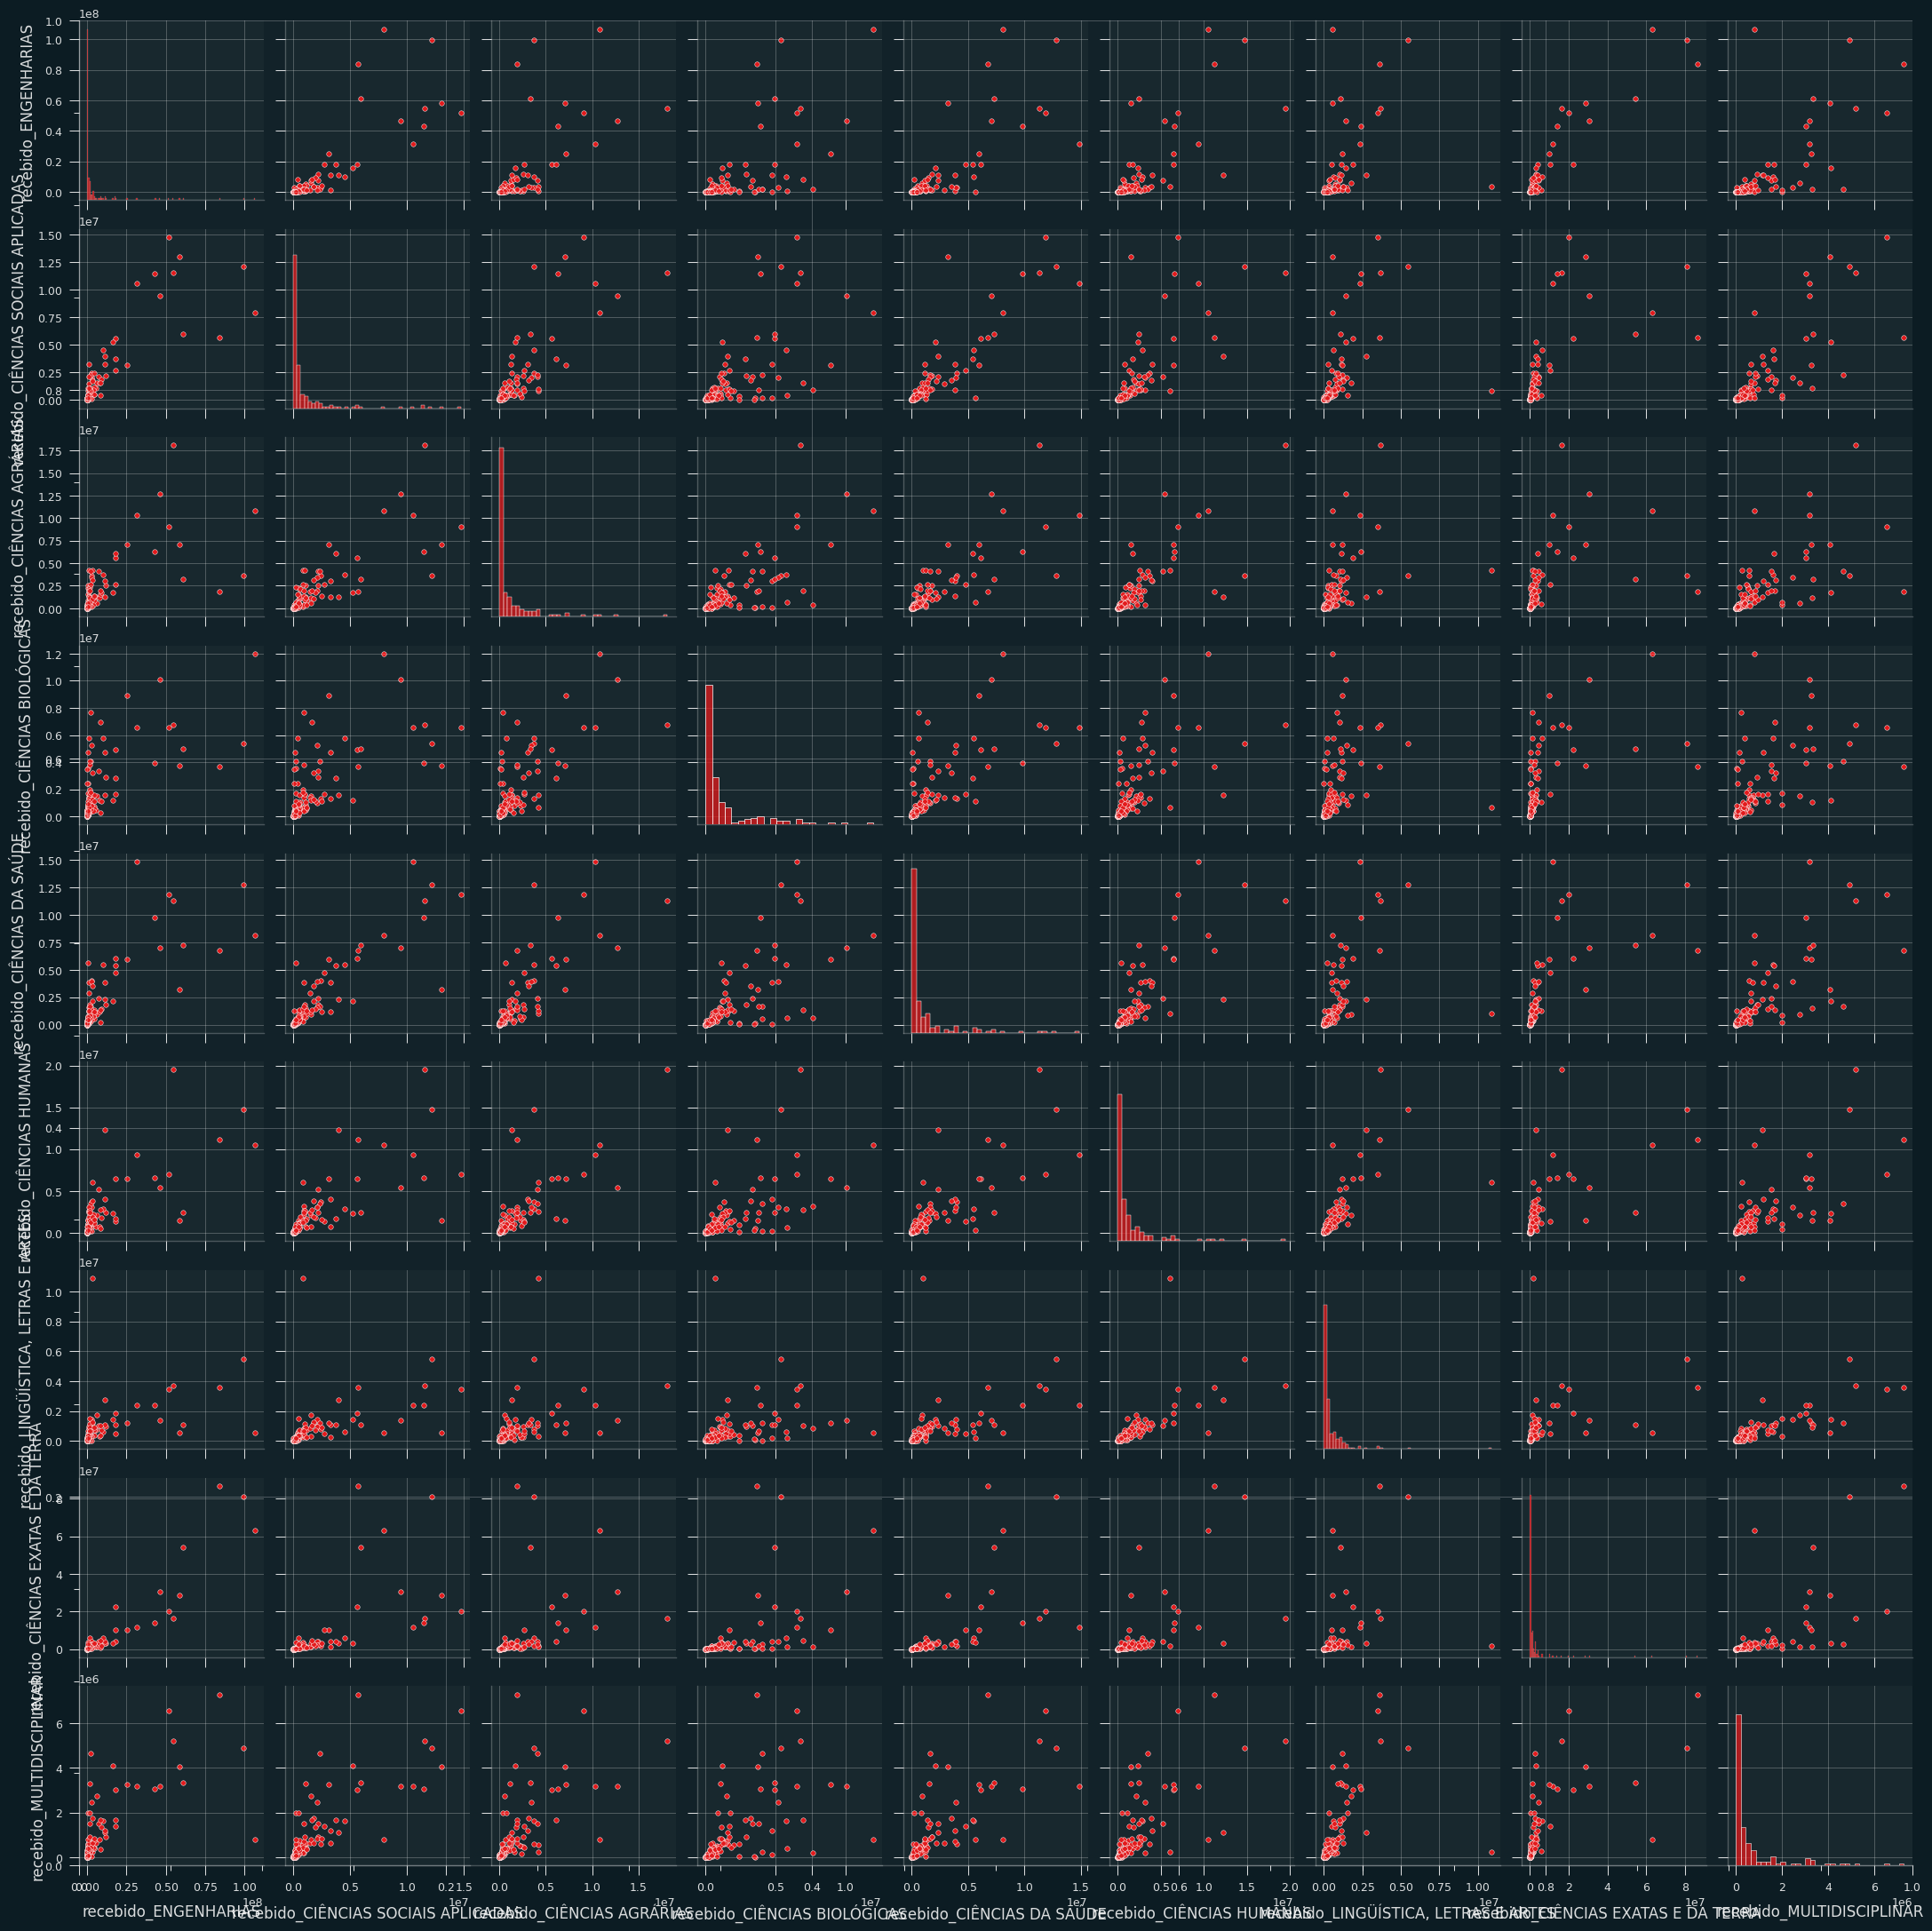

In [30]:
sns.pairplot(df_sep)

<AxesSubplot:>

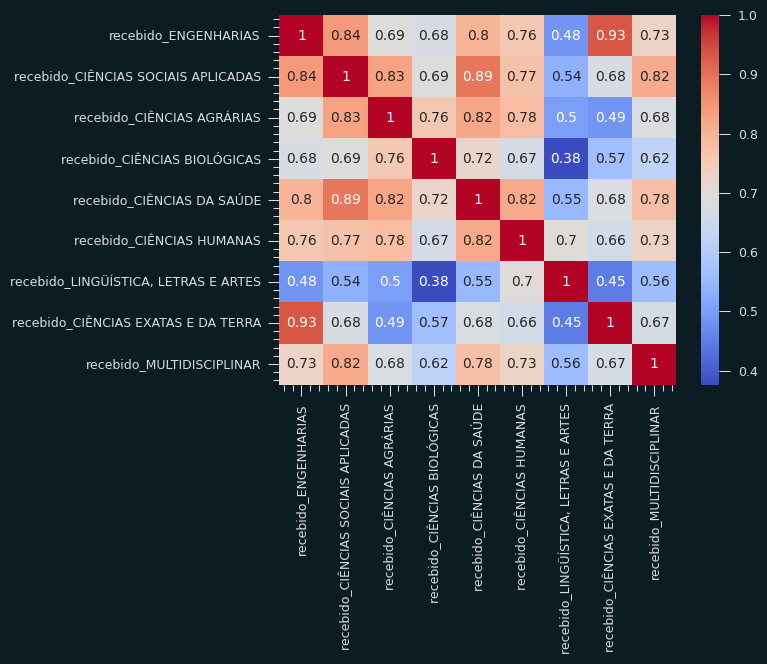

In [31]:
sns.heatmap(df_sep.corr(), cmap="coolwarm", annot=True)

Podemos ver que há correlação entre investimentos em engenharia e em ciências exatas e da terra:

In [32]:
px.scatter(df_sep, x="recebido_ENGENHARIAS", y="recebido_CIÊNCIAS EXATAS E DA TERRA", template="plotly_dark", 
           title="Gráfico de Dispersão entre Investimentos em Engenharia e Ciências Exatas e da Terra")